Part 1: Dimensionality Reduction using PCA

In [1]:
# step 1:Import libraries for data handling and PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# step 2: Load the PCA dataset (Iris) from CSV
df = pd.read_csv("iris_pca_dataset.csv")
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# step 3: Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# step 4: Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame with the 2 principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_df.head()


,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


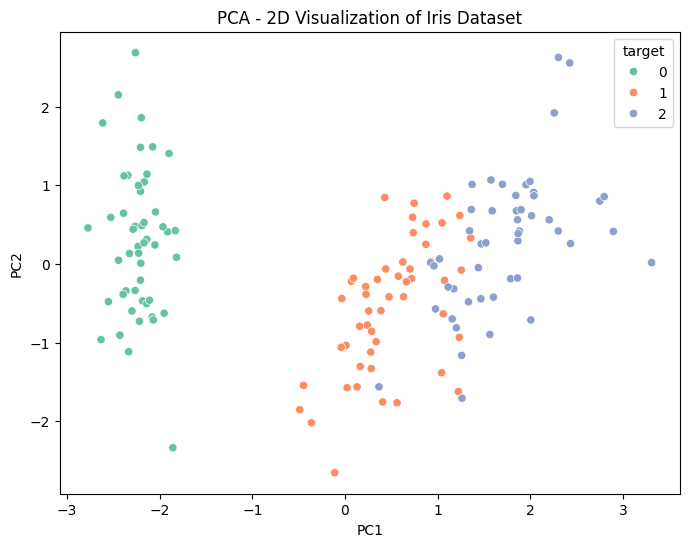

In [5]:
# step 5: Scatter plot of the reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set2')
plt.title('PCA - 2D Visualization of Iris Dataset')
plt.show()


 Part 2: Stock Price Prediction Using ARIMA

In [6]:
# step 6: Import libraries for time series forecasting
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [7]:
# step 7: Load stock prices data
stock_df = pd.read_csv("stock_prices.csv")

# Convert 'Date' to datetime and set as index
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df.set_index('Date', inplace=True)

# Display the first few rows
stock_df.head()


,Open,Close,Volume
Date,,,
2020-01-01,101.251460,100.496714,1504
2020-01-02,100.839987,100.358450,2214
2020-01-03,101.400170,101.006138,2531
2020-01-04,102.934136,102.529168,8576
2020-01-05,102.013997,102.295015,1823


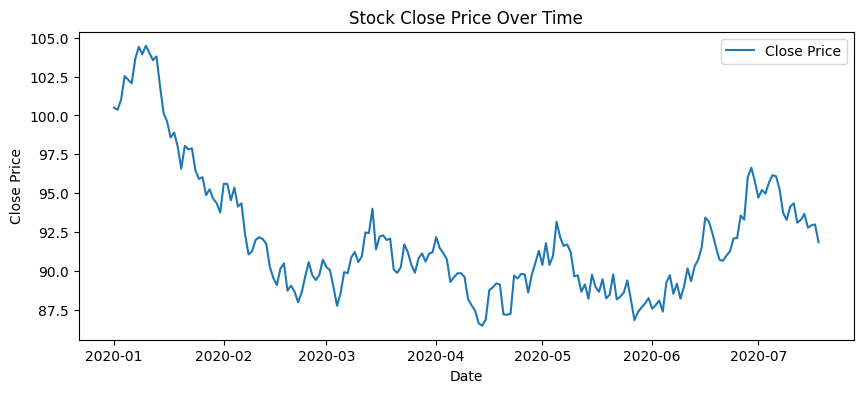

In [8]:
# step 8: Plot Close prices over time
plt.figure(figsize=(10, 4))
plt.plot(stock_df['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [9]:
# step 9: Create a lag feature (previous day's close)
stock_df['Close_lag1'] = stock_df['Close'].shift(1)

# step 10: Create a 7-day moving average
stock_df['MA7'] = stock_df['Close'].rolling(window=7).mean()

# step 11: Drop initial NaN values
stock_df.dropna(inplace=True)
stock_df.head()


,Open,Close,Volume,Close_lag1,MA7
Date,,,,,
2020-01-07,104.258813,103.640091,6029,102.060878,101.769493
2020-01-08,105.027752,104.407525,1133,103.640091,102.328181
2020-01-09,104.672196,103.938051,3105,104.407525,102.839552
2020-01-10,105.307092,104.480611,4627,103.938051,103.335906
2020-01-11,104.039878,104.017193,7316,104.480611,103.548481


In [10]:
# step 12: Use only 'Close' price for ARIMA
close_series = stock_df['Close']

# step 13: Split into train and test
train_size = int(len(close_series) * 0.8)
train, test = close_series[:train_size], close_series[train_size:]


In [11]:
# Fit ARIMA model (p=5, d=1, q=0) - you can tune these values
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast for the test set length
forecast = model_fit.forecast(steps=len(test))


C:\Users\rohid\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rohid\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rohid\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [12]:
# step 14:Evaluation metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 4.52
RMSE: 4.93


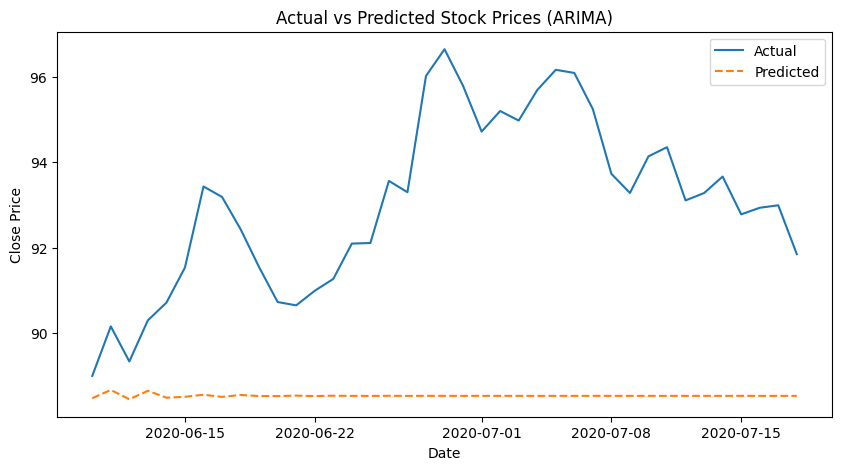

In [13]:
# step 15: Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Stock Prices (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

